#FSI project:
## The Shopping Cart.

The goal of this project is to distinguish different items that can be bought in the supermarket. The dataset consists of 50 images of each class:

- Brick of gazpacho.
- Can of olives.
- Chocolate bar.
- Coke.
- Potato chips.
- Tuna.
- Yogurt.


First the available data will be loaded and the GPU will be used for processing.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
tf.test.gpu_device_name()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


''

In [ ]:
# Alba
!ls "/content/drive/My Drive/Proyecto - FSI/Dataset/"
path = "/content/drive/My Drive/Proyecto - FSI/Dataset/"

'Brick de gazpacho'  'Lata de aceitunas'  'Lata de refresco'   Yogur
 Chocolatina	     'Lata de atún'	  'Paquete de papas'


In [2]:
# Ámbar
!ls "/content/drive/My Drive/Universidad/ULPGC/Ciencia de datos/FSI/Proyecto - FSI/Dataset/"
path = "/content/drive/My Drive/Universidad/ULPGC/Ciencia de datos/FSI/Proyecto - FSI/Dataset/"

DataLego  Joined  model_87.h5  test  train


In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model

def plot_train_val(history):
    plt.rcParams['figure.figsize'] = [15, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    
    ax1.plot(history.history['loss'], label='Loss (train)')
    ax1.plot(history.history['val_loss'], label='Loss (val)')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc="upper right")
    ax2.plot(history.history['accuracy'], label='Accuracy (train)')
    ax2.plot(history.history['val_accuracy'], label='Accuracy (val)')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc="lower right")
    ax1.grid()
    ax2.grid()
    plt.plot()

(-0.5, 3023.5, 3309.5, -0.5)

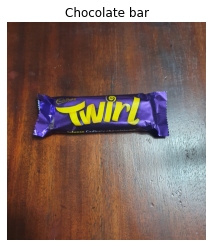

In [4]:
# SHOW DATA
%matplotlib inline
pil_im = Image.open(path + 'Joined/Chocolate bar/20211125_163927.jpg', 'r')
plt.imshow(np.asarray(pil_im))
plt.title("Chocolate bar")
plt.axis('off')

In [5]:
# DATA SOURCE --------------------------------------------------
image_size = (150, 150)
batch_size = 5

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path + "Joined",
    validation_split=0.2,
    labels='inferred',
    subset="training",
    seed=87,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path + "Joined",
    validation_split=0.2,
    labels='inferred',
    subset="validation",
    seed=87,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 350 files belonging to 7 classes.
Using 280 files for training.
Found 350 files belonging to 7 classes.
Using 70 files for validation.


The convolutional neural network model is built and trained with 80% of the data and then validated with the remaining 20%. 

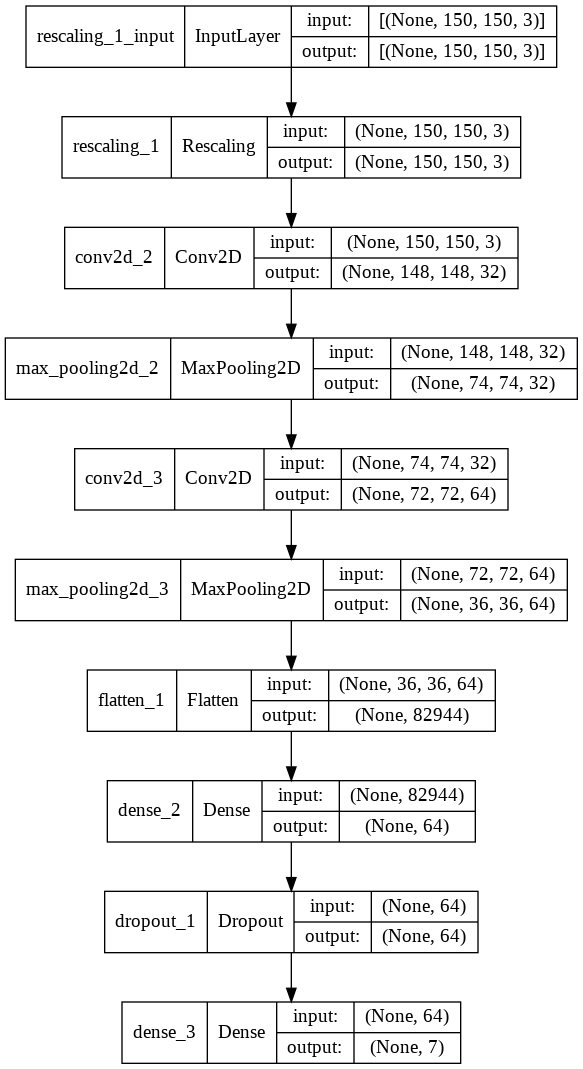

In [6]:
# MODEL --------------------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

def create_model():
    model = Sequential()
    model.add(Rescaling(scale=(1./127.5), offset=-1, input_shape=(image_size[0], image_size[1], 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    return model

model = create_model()
plot_model(create_model(), show_layer_names=True, show_shapes=True)


The neural network parameters are optimised and trained with the best option.

In [49]:
# Optimise hyperparameters
optimizer = ['SGD', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']

for opt in optimizer:
  model = create_model()
  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
  
  print("\n\nOptimizer:", opt, "- Loss: categorical_crossentropy")    
  history = model.fit(train_ds, epochs = 6, validation_data = val_ds, verbose = 0)

  # Show last epoch results
  for key in history.history.keys():
    print(key, round(history.history[key][-1], 5), sep=": ", end=" - ")
  



Optimizer: SGD - Loss: categorical_crossentropy
loss: 0.4259 - accuracy: 0.85 - val_loss: 0.48992 - val_accuracy: 0.81429 - 

Optimizer: Adagrad - Loss: categorical_crossentropy
loss: 1.02136 - accuracy: 0.71429 - val_loss: 1.09135 - val_accuracy: 0.7 - 

Optimizer: Adadelta - Loss: categorical_crossentropy
loss: 1.89769 - accuracy: 0.25714 - val_loss: 1.90423 - val_accuracy: 0.28571 - 

Optimizer: Adam - Loss: categorical_crossentropy
loss: 0.27942 - accuracy: 0.91071 - val_loss: 0.41913 - val_accuracy: 0.81429 - 

Optimizer: Nadam - Loss: categorical_crossentropy
loss: 0.21675 - accuracy: 0.925 - val_loss: 0.35871 - val_accuracy: 0.85714 - 

In [51]:
# TRAINING --------------------------------------------------
epochs = 200
model = create_model()

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Nadam(1e-3),
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    epochs=epochs, 
    validation_data=val_ds,
    callbacks = [es]
)

Epoch 1/200
56/56 [==============================] - 29s 459ms/step - loss: 1.8928 - accuracy: 0.3286 - val_loss: 1.2340 - val_accuracy: 0.6429
Epoch 2/200
56/56 [==============================] - 27s 451ms/step - loss: 0.9269 - accuracy: 0.6607 - val_loss: 0.7941 - val_accuracy: 0.7143
Epoch 3/200
56/56 [==============================] - 27s 451ms/step - loss: 0.5888 - accuracy: 0.8250 - val_loss: 0.5967 - val_accuracy: 0.8143
Epoch 4/200
56/56 [==============================] - 27s 451ms/step - loss: 0.3483 - accuracy: 0.8857 - val_loss: 0.4772 - val_accuracy: 0.8286
Epoch 5/200
56/56 [==============================] - 27s 452ms/step - loss: 0.2630 - accuracy: 0.9214 - val_loss: 0.5190 - val_accuracy: 0.8143
Epoch 6/200
56/56 [==============================] - 27s 452ms/step - loss: 0.3156 - accuracy: 0.9071 - val_loss: 0.3732 - val_accuracy: 0.8571
Epoch 7/200
56/56 [==============================] - 27s 449ms/step - loss: 0.1348 - accuracy: 0.9571 - val_loss: 0.5087 - val_accuracy:

### Evaluating results

The accuracy obtained with the validation dataset is acceptable but 90% accuracy is not achieved.

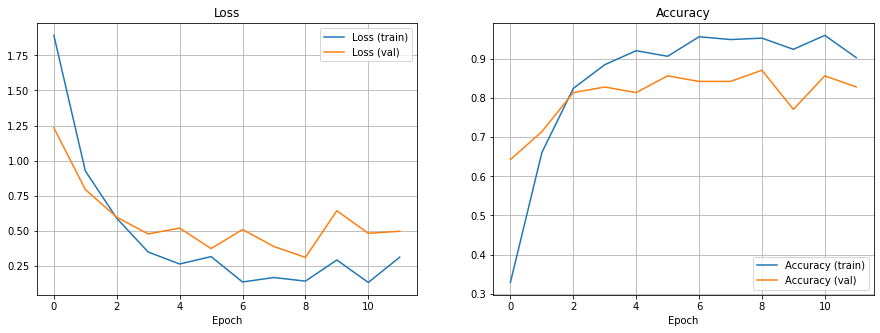

In [52]:
plot_train_val(history)

In [53]:
# Classification report
results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

print(classification_report(labels, predictions, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.7857    0.8800        14
           1     0.7778    0.8750    0.8235         8
           2     0.7000    0.8750    0.7778         8
           3     1.0000    0.7500    0.8571        12
           4     0.7500    1.0000    0.8571         9
           5     0.8889    1.0000    0.9412         8
           6     1.0000    0.9091    0.9524        11

    accuracy                         0.8714        70
   macro avg     0.8738    0.8850    0.8699        70
weighted avg     0.8955    0.8714    0.8734        70



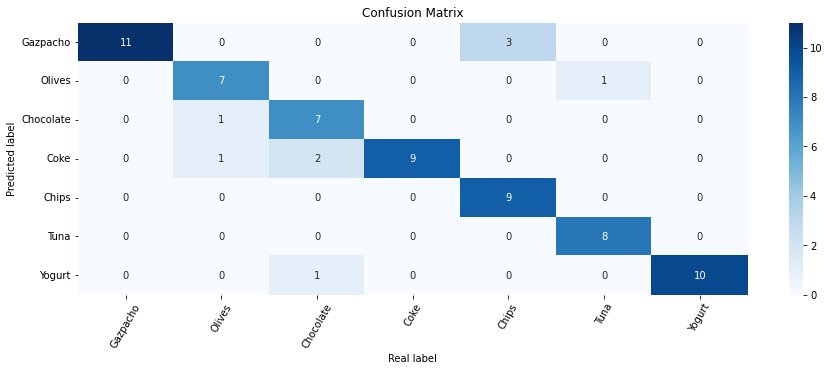

In [54]:
# Confusion matrix
label_tag = ["Gazpacho", "Olives", "Chocolate", "Coke", "Chips", "Tuna", "Yogurt"]
cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
tick_marks = np.arange(len(label_tag))
plt.xticks(tick_marks+0.5, label_tag, rotation=60)
plt.yticks(tick_marks+0.5, label_tag, rotation='horizontal')
plt.title("Confusion Matrix")
plt.ylabel('Predicted label')
plt.xlabel('Real label')
plt.show()

The most commonly confused products are the brick of gazpacho and the bag of chips, probably because both products are red in colour. 

There are several improvements that can be made to the training to achieve better performance. One of the critical elements to get good results is to have a large dataset. Unfortunately, this is difficult or expensive in many cases. However, we can artificially enlarge the dataset by using the technique of data augmentation.

#### **Data augmentation**

The same neural network has been trained with a dataset augmented with transformations. The dataset has been augmented by inverting, enlarging, rotating and shifting the range of the dimensions of the available images to obtain new ones.


In [55]:
# DATA SOURCE --------------------------------------------------
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=30,
  horizontal_flip=True,
  width_shift_range=0.2, 
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2)

# DATA AUGMENTATION ---------------------------------------
train_generator = img_gen.flow_from_directory(
    path + 'train',
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = img_gen.flow_from_directory(
    path + 'test',
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 282 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [56]:
# TRAINING --------------------------------------------------
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()

    model_cnn.compile(loss='categorical_crossentropy', 
        optimizer=tf.keras.optimizers.Nadam(1e-3), metrics=['accuracy'])
    
    history_aug = model_cnn.fit(
        train_generator,
        steps_per_epoch = 213//batch_size,
        validation_data = validation_generator,
        validation_steps = 33//batch_size,
        epochs = 20,
        batch_size = batch_size*3,
        verbose = 1
    )

Epoch 1/20
42/42 [==============================] - 173s 3s/step - loss: 2.1209 - accuracy: 0.1932 - val_loss: 1.6950 - val_accuracy: 0.3667
Epoch 2/20
42/42 [==============================] - 76s 2s/step - loss: 1.6408 - accuracy: 0.2995 - val_loss: 1.1720 - val_accuracy: 0.7000
Epoch 3/20
42/42 [==============================] - 56s 1s/step - loss: 1.2843 - accuracy: 0.5121 - val_loss: 1.0979 - val_accuracy: 0.6000
Epoch 4/20
42/42 [==============================] - 51s 1s/step - loss: 1.2353 - accuracy: 0.5556 - val_loss: 1.0153 - val_accuracy: 0.5333
Epoch 5/20
42/42 [==============================] - 49s 1s/step - loss: 1.0686 - accuracy: 0.5700 - val_loss: 0.7603 - val_accuracy: 0.7667
Epoch 6/20
42/42 [==============================] - 47s 1s/step - loss: 0.9390 - accuracy: 0.5942 - val_loss: 0.6649 - val_accuracy: 0.6667
Epoch 7/20
42/42 [==============================] - 54s 1s/step - loss: 0.8894 - accuracy: 0.6473 - val_loss: 0.5261 - val_accuracy: 0.8667
Epoch 8/20
42/42 [=

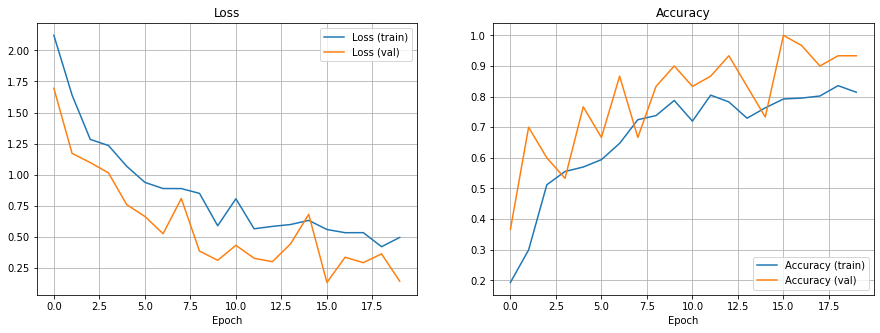

In [57]:
plot_train_val(history_aug)

As the dataset is increased, there is a clear improvement in accuracy, exceeding 90%. However, it is possible to go a step further and use transfer learning. 

## **Transfer Learning**

Transfer learning is a widely used method for building neural network models that usually gives good results when there are not many training samples. It involves using the convolutional layers of a previously trained network with a large number of images, freezing their weights (or features) and connecting a final fully connected part that performs the classification task of the particular dataset. The only weights that are modified during the training phase will be those of the fully connected part.



In [ ]:
# TRANSFER MODEL --------------------------------------------------
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(image_size[0], image_size[1], 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = tf.keras.Input(shape=(image_size[0], image_size[1], 3))

# Make sure that the base_model is running in inference mode by passing training=False.
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Convert features of shape base_model.output_shape[1:] to vectors
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
# TRAINING --------------------------------------------------
epochs = 15

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=3, restore_best_weights=True)

history_transf = model.fit(
    train_ds,
    epochs=epochs, 
    validation_data=val_ds,
    callbacks = [es]
)

Epoch 1/15
56/56 [==============================] - 95s 2s/step - loss: 12.2981 - accuracy: 0.2036 - val_loss: 1.8750 - val_accuracy: 0.6000
Epoch 2/15
56/56 [==============================] - 94s 2s/step - loss: 4.2587 - accuracy: 0.5000 - val_loss: 0.7630 - val_accuracy: 0.8000
Epoch 3/15
56/56 [==============================] - 94s 2s/step - loss: 2.7264 - accuracy: 0.6464 - val_loss: 0.6016 - val_accuracy: 0.8429
Epoch 4/15
56/56 [==============================] - 94s 2s/step - loss: 1.8466 - accuracy: 0.7107 - val_loss: 0.5943 - val_accuracy: 0.8429
Epoch 5/15
56/56 [==============================] - 94s 2s/step - loss: 1.3233 - accuracy: 0.7786 - val_loss: 0.4065 - val_accuracy: 0.9000
Epoch 6/15
56/56 [==============================] - 93s 2s/step - loss: 1.4329 - accuracy: 0.7500 - val_loss: 0.3647 - val_accuracy: 0.8857
Epoch 7/15
56/56 [==============================] - 94s 2s/step - loss: 0.8722 - accuracy: 0.8464 - val_loss: 0.3291 - val_accuracy: 0.9429
Epoch 8/15
56/56 [=

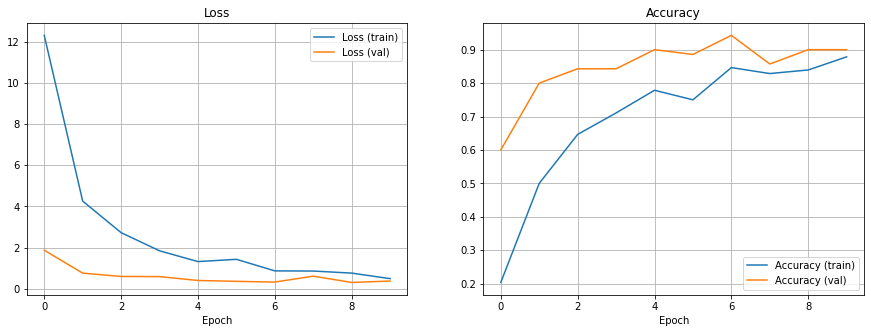

In [ ]:
plot_train_val(history_transf)

The neural network learns so fast that overfitting occurs easily, to reduce this effect dropout layers can be added. By having part of the network pre-trained, very high accuracies are achieved in few epochs.